In [740]:
import pandas
import numpy
import matplotlib
import statsmodels.api
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
from matplotlib import pyplot

FILE_PATH: str = "./winequality-red.csv"
COLUMNS: list = ['5', '6', '7', '9', '10', '11']
COLUMNS_MAP: dict = {
    '1': 'fixed acidity',
    '2': 'volatile acidity',
    '3': 'citric acid',
    '4': 'residual sugar',
    '5': 'chlorides',
    '6': 'free sulfur dioxide',
    '7': 'total sulfur dioxide',
    '8': 'density',
    '9': 'pH',
    '10': 'sulphates',
    '11': 'alcohol',
    '12': 'quality',
}

In [741]:
df: pandas.DataFrame = pandas.read_csv(FILE_PATH, sep=",")

# Перші 10 рядків даних.
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [742]:
# Згідно аналізу даних таблиці, усі дані мають числових формат.
# Пусті значення у полях таблиці відсутні.
# Дані таблиці нормалізації не потребують.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [743]:
# Повна статистика.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [744]:
# Поля таблиці, на основі даних яких буде проводитись аналіз
columns_names: list = []

for key in COLUMNS:
    if key in COLUMNS_MAP is not None:
        columns_names.append(COLUMNS_MAP[key])

columns_names

['chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [745]:
#
#
#
# Лінійна регресія
#
#
#

In [746]:
# Значення полів, на основі яких буде проводитись навчання моделі
X: numpy.ndarray = df[columns_names].values

# Перші 10 рядків
X[:10]

array([[7.60e-02, 1.10e+01, 3.40e+01, 3.51e+00, 5.60e-01, 9.40e+00],
       [9.80e-02, 2.50e+01, 6.70e+01, 3.20e+00, 6.80e-01, 9.80e+00],
       [9.20e-02, 1.50e+01, 5.40e+01, 3.26e+00, 6.50e-01, 9.80e+00],
       [7.50e-02, 1.70e+01, 6.00e+01, 3.16e+00, 5.80e-01, 9.80e+00],
       [7.60e-02, 1.10e+01, 3.40e+01, 3.51e+00, 5.60e-01, 9.40e+00],
       [7.50e-02, 1.30e+01, 4.00e+01, 3.51e+00, 5.60e-01, 9.40e+00],
       [6.90e-02, 1.50e+01, 5.90e+01, 3.30e+00, 4.60e-01, 9.40e+00],
       [6.50e-02, 1.50e+01, 2.10e+01, 3.39e+00, 4.70e-01, 1.00e+01],
       [7.30e-02, 9.00e+00, 1.80e+01, 3.36e+00, 5.70e-01, 9.50e+00],
       [7.10e-02, 1.70e+01, 1.02e+02, 3.35e+00, 8.00e-01, 1.05e+01]])

In [747]:
# Значення поля, на основі якого буде проводитись навчання моделі,
# і значення якого буде прогнозуватись моделю
y: numpy.ndarray = df['quality'].values

# Перші 10 рядків
y[:10]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5])

In [748]:
# Розділення даних для тренування моделі та її тестування
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

# Навчання моделі прогнозування
regresion_model_1: sklearn.linear_model.LinearRegression = sklearn.linear_model.LinearRegression()
regresion_model_1.fit(X_train, y_train)

# Отримання прогнозованих даних, на основі частини існуючих даних, для перевірки похибки на графіку 
y_predicted: numpy.ndarray = regresion_model_1.predict(X_test)

In [749]:
# Коефіцієнт детермінації R²:
r_square: float = regresion_model_1.score(X_train, y_train)

r_square

0.3078104782338481

In [750]:
# Коефіцієнт b₀:

regresion_model_1.intercept_

4.840828861465415

In [751]:
# Коефіцієнт b₁:

regresion_model_1.coef_

array([-2.7641029 ,  0.00615695, -0.0040508 , -0.87179976,  1.10933145,
        0.31606419])

In [752]:
# Середня квадратична помилка MSE:

mse: float = sklearn.metrics.mean_squared_error(y_test, y_predicted)

mse

0.39597234123968106

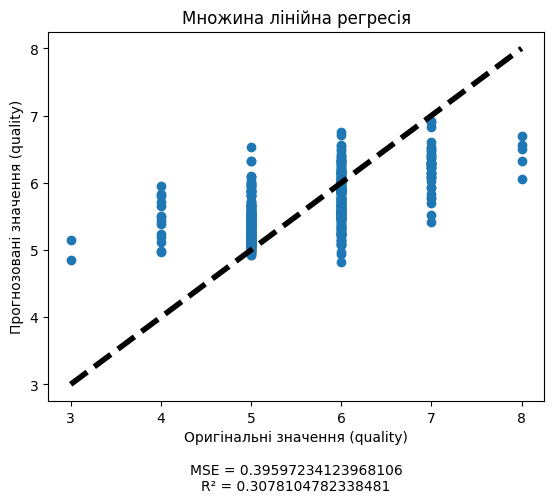

In [753]:
# Побудова графіку порівняння оригінальних та прогнозованих значень
pyplot.scatter(y_test, y_predicted)
pyplot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
pyplot.title('Множина лінійна регресія')
pyplot.xlabel('Оригінальні значення (quality)\n\nMSE = {}\nR² = {}'.format(mse, r_square))
pyplot.ylabel('Прогнозовані значення (quality)')

pyplot.show()

In [754]:
#
#
#
# Поліноміальна регресія
#
#
#

In [755]:
# Функція для створення поліноміальної регресійної моделі і на її основі,
# отримання прогнозаваних значень, коефіцієнта детермінації R², середньої квадратичної помилки MSE,
# коефіцієнта b₀ та b₁, та побудови графіка порівняння оригінальних та прогнозованих значень
def polynomial_regression_calculate(X_train, y_train, X_test, y_test, degree) -> None:
    polynomial_regression_model: sklearn.preprocessing.PolynomialFeatures = sklearn.preprocessing.PolynomialFeatures(degree=degree)
    
    X: numpy.ndarray = polynomial_regression_model.fit_transform(X_train)

    polynomial_regression_model.fit(X, y_train)

    linear_regression_model: sklearn.linear_model.LinearRegression = sklearn.linear_model.LinearRegression()
    linear_regression_model.fit(X, y_train)
    
    y_predicted: numpy.ndarray = linear_regression_model.predict(X)
    
    r_square: float = linear_regression_model.score(X, y_train)
    mse: float = sklearn.metrics.mean_squared_error(y_train, y_predicted)

    print('Коефіцієнт b₀ = {}'.format(linear_regression_model.intercept_))
    print('Коефіцієнт b₁ = {}'.format(linear_regression_model.coef_))
    
    # Побудова графіку порівняння оригінальних та прогнозованих значень
    pyplot.scatter(y_train, y_predicted)
    pyplot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    pyplot.title('Множина поліноміальна регресія\n(значення ступеня ознаки полінома degree = {})'.format(degree))
    pyplot.xlabel('Оригінальні значення (quality)\n\nMSE = {}\nR² = {}'.format(mse, r_square))
    pyplot.ylabel('Прогнозовані значення (quality)')

    pyplot.show()

Коефіцієнт b₀ = -433.6375456253712
Коефіцієнт b₁ = [-2.48195985e-05  7.06218408e+02 -2.15280291e+00  3.74892835e-01
  3.35666583e+02  1.51050054e+02  5.53459280e+00  1.70129360e+02
  1.09243651e+00  5.71107071e-01 -3.25992727e+02 -2.33663953e+02
 -2.53064035e+01  1.25015106e-02 -6.42934504e-03  7.46989953e-01
  1.66027126e+00  5.89050501e-02  1.69789277e-03 -2.32509512e-01
 -5.31276521e-01  1.79769419e-02 -7.79164301e+01 -7.96470520e+01
 -6.43252789e+00  1.45169721e+01 -4.37718358e+00  5.86559096e-01
 -4.68358073e+01  1.19167754e+00 -1.63309660e+00  4.81061696e+01
  7.05066503e+01 -3.16950852e+01 -1.13858421e-03  9.99574358e-03
 -1.35627604e+00 -8.01388651e-01  2.65081259e-01 -2.49699923e-03
  2.99104153e-01  8.37545201e-01 -1.57269247e-01  3.48602598e+01
  3.72645710e+01  6.67186004e+00 -1.38410152e+01  9.55683740e+00
  2.86461133e-01  6.29015790e-05 -2.86300987e-05 -4.03159895e-03
  2.12514418e-03 -3.44201801e-04  5.20256372e-06  1.13073055e-03
 -1.04471163e-03  3.14603665e-04 -5.619

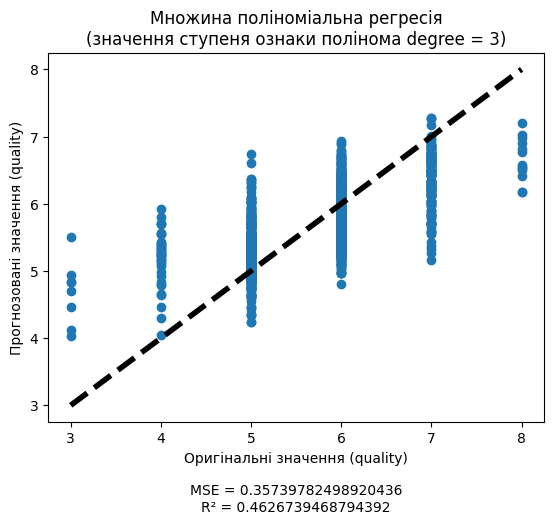

In [756]:
# Поліноміальна регресія (degree = 3)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 3)

Коефіцієнт b₀ = 435.15784302298994
Коефіцієнт b₁ = [ 3.38188755e+01  1.54871205e+02 -1.97642816e+02  7.50543393e+01
 -1.38239822e+01 -6.19211695e+01 -3.10098964e+01  1.12789893e+02
  7.22023385e+01  7.19369117e+01  1.45402721e+02  1.73421374e+01
  3.95935318e+02 -4.54141748e+00  3.14411054e+00 -4.19923487e+02
  1.00271141e+03  1.47751845e+02 -1.42503023e+00  2.38903046e+02
 -1.97431609e+02 -8.63763402e+01  6.42781626e+00  5.23283500e+01
 -1.67844453e+02  8.16608175e+01 -4.44966346e+02  3.99798636e+01
  6.46349479e+01  3.82752534e+02  2.09242065e+02  1.04505369e+02
  1.24082531e+02  4.14395702e+02  6.47197743e+01 -1.91071169e+01
 -1.76044715e+02  4.71057275e+02 -8.42095058e+01  8.86164654e-01
 -4.64279955e+02 -6.90095405e+02  1.87112098e+02  1.45668946e+01
  1.15818514e+01  2.01313142e+02  4.02686226e+01 -4.83699481e+01
 -2.17573259e+02 -7.34333086e-02  5.00399187e-02  3.17652324e+00
 -2.58080338e+00  7.80501687e-02 -1.68618931e-02 -2.55870068e+00
 -2.10874826e-01  9.71608623e-02  3.502

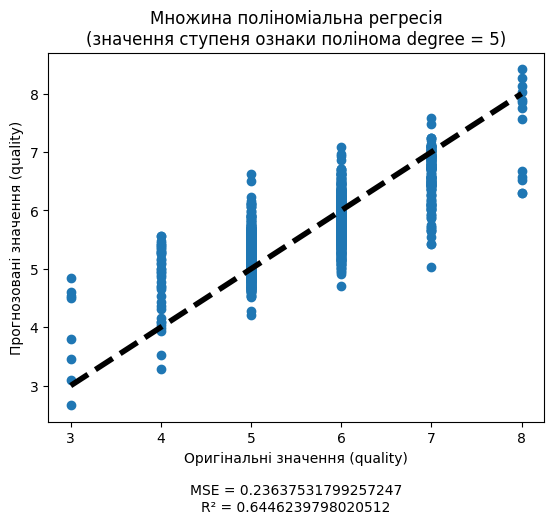

In [757]:
# Поліноміальна регресія (degree = 5)

polynomial_regression_calculate(X_train, y_train, X_test, y_test, 5)

Коефіцієнт b₀ = 44.16433038674952
Коефіцієнт b₁ = [ 2.08861857e-01  1.34613928e+00  1.83162625e-01  3.37912834e-01
 -5.33235425e-02  3.51569106e-02 -5.12723286e-02 -1.56924282e-02
 -6.98419404e-02 -1.80370625e-01 -5.31150868e-02  1.60628837e-03
 -1.23413049e-01  4.95732169e-01  1.03299684e+00 -4.95013458e-02
  3.87111964e-02  2.28750779e-01  2.69278258e+00  6.41316297e-02
  1.12630090e-02  7.91590347e-01 -4.47292004e-02  1.13510180e-03
 -1.89662787e-01 -1.80005183e-02 -3.01944994e-03 -5.12014967e-01
 -3.80617063e-03  2.31835731e-02 -4.25037972e-02 -6.28549200e-03
 -5.16218364e-03 -1.51001858e-02 -3.99166054e-01 -7.79260375e-01
 -1.14488908e-01  2.74975236e-02 -1.17609967e-01 -1.19903836e+00
 -3.90612015e-01 -1.59055616e-02 -5.68488569e-01 -9.62573367e-02
  3.28287550e-04 -2.60570763e-01 -5.00505589e-03 -2.64082185e-03
 -5.79730849e-01  1.15986332e+00 -1.35608152e+00 -4.58592431e-01
  2.01533973e-01  3.95370855e-01  4.53151962e-01 -2.61503802e-01
 -8.50699891e-01 -3.99123965e-01 -3.1856

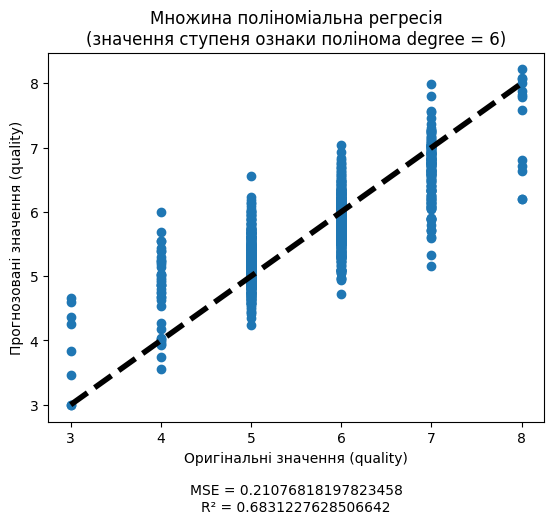

In [758]:
# Поліноміальна регресія (degree = 6)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 6)

Коефіцієнт b₀ = 11.910462352839682
Коефіцієнт b₁ = [-1.29337705e-04  2.07779675e-04  8.37935092e-05 ... -1.96894175e-04
  7.31323092e-05 -4.77704553e-05]


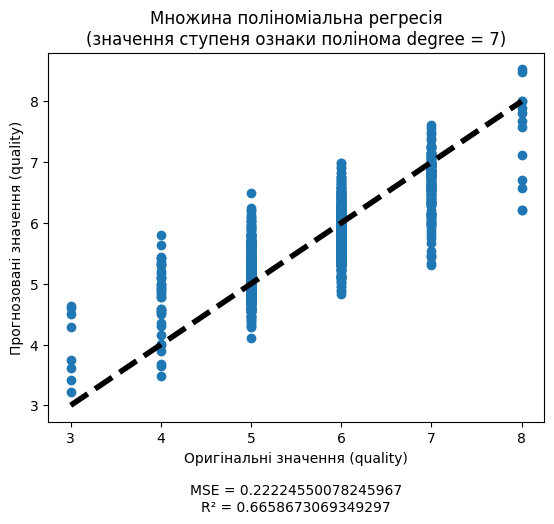

In [759]:
# Поліноміальна регресія (degree = 7)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 7)

In [760]:
# Висновок:
#
# Згідно проведеного аналізу даних, чітко видно з графіків,
# що у регресійних моделях із багатьма змінними (множинних регресійних моделях)
# (якість вина залежить від багатьох його характеристик),
# лінійна регресійна модель, показує значно гірший результат у плані прогнозування,
# на відміну від поліноміальних моделей. Коефіцієнт детермінації лінійної регресійної 
# моделі (на основі даних аналізу) R² = 0.3078104782338481, що є не задовільним значенням,
# і навряд зможе використовуватись у реальних умовах.
#
# Щодо поліноміальних регресійних моделей, то із зміною ступеня ознаки полінома,
# при його значені 6, коефіцієнт детермінації (на основі даних аналізу) найвищий,
# і рівний R² =  0.6831227628506642. При більшому і меншому значенні ступеня,
# значення коефіцієнту детермінації падає.
#
# Щодо значення середньої квадратичної помилки, то у поліноміальної регресійної моделі,
# із значенням ступеня ознаки полінома 6, значення середньої квадратичної помилки найнижче
# у порівнянні із іншими ступенями ознак полінома, та у порівнянні із значенням середньої
# квадратичної помилки у лінійної регресійної моделі - MSE = 0.21076818197823458 у поліноміальної
# регресійної моделі, проти MSE = 0.39597234123968106 у лінійної регресійної моделі.
#
# Як результат, у даному випадку, із даними що надані, найкращою моделлю для прогнозування є
# поліноміальна регресійна модель із ступенем ознаки полінома 6.